# Linear Regression - Gradient Descent

This notebook shows an implementation of how to solve a linear regression model using the *gradient descent* algorithm.

### Data Set

The dataset that we will be working with is a 2 variable dataset showing the relationship between the number of years experience that each participant has at their job, and their current salary (one would indeed hope that there was a positive linear relationship there).

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset = pd.read_csv("./data/salary-data.csv")

print(dataset.iloc[:5, :]) # first 5 rows

X = dataset.iloc[:, :-1].values # get the data as a numpy array
y = dataset.iloc[:, -1:].values

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0


### The Hypothesis

For a linear regression model, we are assuming that the hypothesis (the shape of our model), will be of the form $h_\theta(x) = \theta_0 + \theta_1 x$.

In [2]:
def get_hypothesis(theta):
    
    def hypothesis(X):
        theta_0, theta_1 = theta
        return theta_0 + (theta_1 * X)
    
    return hypothesis
        
# sanity check tests
test_h = get_hypothesis((1,1))
assert test_h(1) == 2
test_h = get_hypothesis((1,2))
assert test_h(2) == 5
test_h = get_hypothesis((10,12))
assert test_h(3) == 46

### The Cost Function

The basic cost function used for linear regression is the *mean squared error* function, $J(\theta) = \frac{1}{2m} \sum_{i=1}^m ( h_\theta(x^{(i)}) - y^{(i)} )^2$. i.e. the average of the squared distance from the predicted value to the actual value. (The notation $x^{(i)}$ is used to denote the $i^{th}$ data point.)

In [4]:
def get_mean_squared_error(theta):
    
    def mean_squared_error(X, y):
        h = get_hypothesis(theta)
        return (1 / (2 * X.size)) * np.sum((h(X) - y)**2)
    
    return mean_squared_error
    
mse = get_mean_squared_error((0,1))
assert mse(np.array([1,2,3]), np.array([2,3,4])) == 0.5
mse = get_mean_squared_error((1,4))
assert mse(np.array([1,2,3]), np.array([2,3,4])) == 21
    

### Gradient Descent

To implement the gradient descent algorithm we need to calculate the partial differentials of the *cost function*, with respect to each of the $\theta_i$. For the *mean squared error* function,

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^m ( \theta_0 + \theta_1 x^{(i)} - y^{(i)} )^2
$$

this gives us:

$$\begin{align}
\frac{\partial J}{\partial \theta_0} &= \frac{1}{m} \sum_{i=1}^m ( \theta_0 + \theta_1 x^{(i)} - y^{(i)} ) \\
\frac{\partial J}{\partial \theta_1} &= \frac{1}{m} \sum_{i=1}^m x^{(i)} ( \theta_0 + \theta_1 x^{(i)} - y^{(i)} ) \\.
\end{align}$$

Using these results we can then perform the incremental updates of

$$
\theta_{j, t+1} = \theta_{j, t} - \alpha \frac{\partial J}{\partial \theta_j}.
$$

In [56]:
def get_theta_0_partial(X, y):
    
    def partial(theta):
        theta_0, theta_1 = theta
        return (1 / len(X)) * np.sum(theta_0 + theta_1 * X - y)
    
    return partial

def get_theta_1_partial(X, y):
    
    def partial(theta):
        theta_0, theta_1 = theta
        return (1 / len(X)) * np.sum(X * (theta_0 + theta_1 * X - y))
    
    return partial

def get_step_gradient_descent(X, y, alpha):
    
    partial_theta_0 = get_theta_0_partial(X, y)
    partial_theta_1 = get_theta_1_partial(X, y)
    
    def step_gradient_descent(theta):
        theta_0, theta_1 = theta
        theta_0_next = theta_0 - alpha * partial_theta_0(theta)
        theta_1_next = theta_1 - alpha * partial_theta_1(theta)
        return (theta_0_next, theta_1_next)
    
    return step_gradient_descent

In [65]:
def fit_linear_regression_model(X, y, theta=(0,1), alpha=0.01):
    step_gradient_descent = get_step_gradient_descent(X, y, alpha)
    step = 0
    error_change_threshold = 0.1
    mse = get_mean_squared_error(theta)
    error = mse(X, y)
    error_change = error
    #print(f"step {step}: theta = {theta}, mse = {error}, error change = {error_change}")
    while abs(error_change) > error_change_threshold:
        step += 1
        theta = step_gradient_descent(theta)
        mse = get_mean_squared_error(theta)
        new_error = mse(X, y)
        error_change = error - new_error
        error = new_error
        #print(f"step {step}: theta = {theta}, mse = {round(error)}, error change = {round(error_change)}")
    print(f"returning after {step} steps...")
    print(f"theta = {theta}")
    return theta
        

In [66]:
theta = fit_linear_regression_model(X, y, theta=(0,1), alpha=0.01)

h = get_hypothesis(theta)

y_prime = h(X)

returning after 3490 steps...
theta = (25777.466234939147, 9452.148779987654)


In [67]:
for a in np.linspace(0, 0.05, 20):
    fit_linear_regression_model(X, y, theta=(0,1), alpha=a)

returning after 1 steps...
theta = (0.0, 1.0)
returning after 12068 steps...
theta = (25763.389901736366, 9454.237648903281)
returning after 6344 steps...
theta = (25771.84062043273, 9452.983597628332)
returning after 4350 steps...
theta = (25775.59178085561, 9452.426941126103)
returning after 3326 steps...
theta = (25777.813009286136, 9452.097320126359)
returning after 2701 steps...
theta = (25779.364511705426, 9451.86708366282)
returning after 2277 steps...
theta = (25780.46503697841, 9451.703770319746)
returning after 1971 steps...
theta = (25781.33929571791, 9451.574033982957)
returning after 1740 steps...
theta = (25782.081346206574, 9451.46391679709)
returning after 1558 steps...
theta = (25782.66194936734, 9451.377757718774)
returning after 1411 steps...
theta = (25783.139004240023, 9451.306964772893)
returning after 1290 steps...
theta = (25783.55391460853, 9451.245393811263)
returning after 1189 steps...
theta = (25783.940825438895, 9451.187977863869)
returning after 1103 step

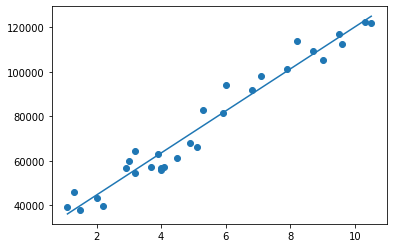

In [68]:
%matplotlib inline

fig = plt.figure()
ax = fig.subplots()
ax.scatter(X, y)
ax.plot(X, y_prime)
plt.show()